# Exercise 0 - uppvärmning med riket
a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

In [2]:
import pandas as pd

df_riket = pd.read_excel("../Laboration2/Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Function to rename column names
def rename_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# If sheet_name is in sheets column name is changed on each sheet and DataFrame
for sheet_name, df in df_riket.items():
    if sheet_name in sheets:
        df_riket[sheet_name] = rename_columns(df)

b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [3]:
def calculate_f_grade(df, total_column, girls_column, boys_column):
    # Extract percentage of girls with grades A-E
    girls_percentage = float(str(df.iloc[0][girls_column]).replace(',', '.'))
    # Extract total number of girls with grades A-F
    total_girls_a_f = int(df.iloc[0][girls_column.replace('(A-E)', '(A-F)')])
    # Calculate number of girls with grade F
    girls_f = int((100 - girls_percentage) / 100 * total_girls_a_f)

    total_percentage = float(str(df.iloc[0][total_column]).replace(',', '.'))
    total_students_a_f = int(df.iloc[0][total_column.replace('(A-E)', '(A-F)')])
    total_f = int((100 - total_percentage) / 100 * total_students_a_f)

    boys_percentage = float(str(df.iloc[0][boys_column]).replace(',', '.'))
    total_boys_a_f = int(df.iloc[0][boys_column.replace('(A-E)', '(A-F)')])
    boys_f = int((100 - boys_percentage) / 100 * total_boys_a_f)
    return girls_f, total_f, boys_f

# Access the "Matematik" DataFrame
df_math = df_riket["Matematik"]

# Calculate the number of total, boys, and girls students who received an F in mathematics
total_f, boys_f, girls_f = calculate_f_grade(df_math, "Totalt (A-E)", "Pojkar (A-E)", "Flickor (A-E)")

print("Total number of students who received an F in mathematics:", total_f)
print("Number of boys who received an F in mathematics:", boys_f)
print("Number of girls who received an F in mathematics:", girls_f)

Total number of students who received an F in mathematics: 5797
Number of boys who received an F in mathematics: 11637
Number of girls who received an F in mathematics: 5824


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

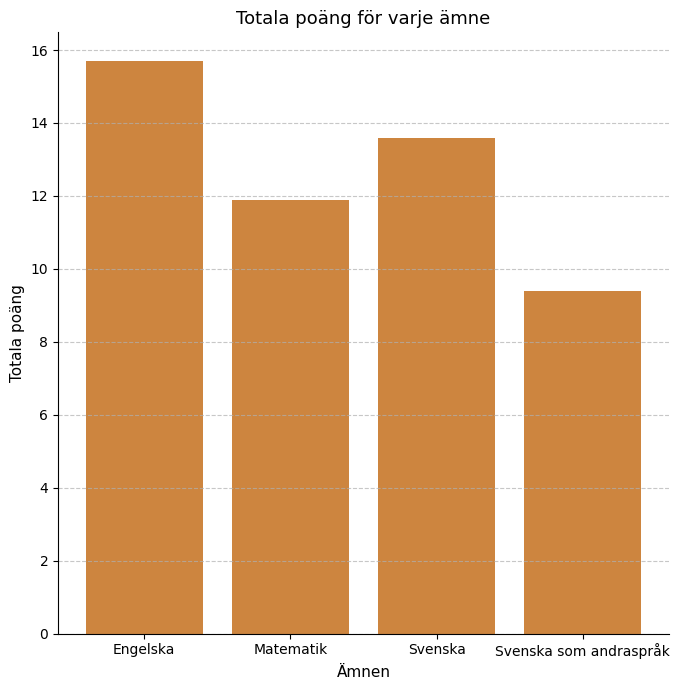

In [4]:
import matplotlib.pyplot as plt

def plot_total_points(df_dict):
    subjects = list(df_dict.keys())
    total_points = []

    for subject in subjects:
        # Ignore the last sheet "Rapportbeskrivning och def"
        if subject != "Rapportbeskrivning och def.":
            try:
                # Extract total point from DataFrame for specific subject
                total_point = float(df_dict[subject].loc[0]["Totalt (poäng)"])
                total_points.append(total_point)
            except (ValueError, KeyError):
                # If column doesn't exist or the value can't convert to float. Set value to 0.
                total_points.append(0)  

    plt.figure(figsize=(7, 7))
    # Ignore last sheet
    plt.bar(subjects[:-1], total_points, color='peru')  
    plt.title('Totala poäng för varje ämne', fontsize=13)
    plt.xlabel('Ämnen', fontsize=11)
    plt.ylabel('Totala poäng', fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Delete top and right spine
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_total_points(df_riket)

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

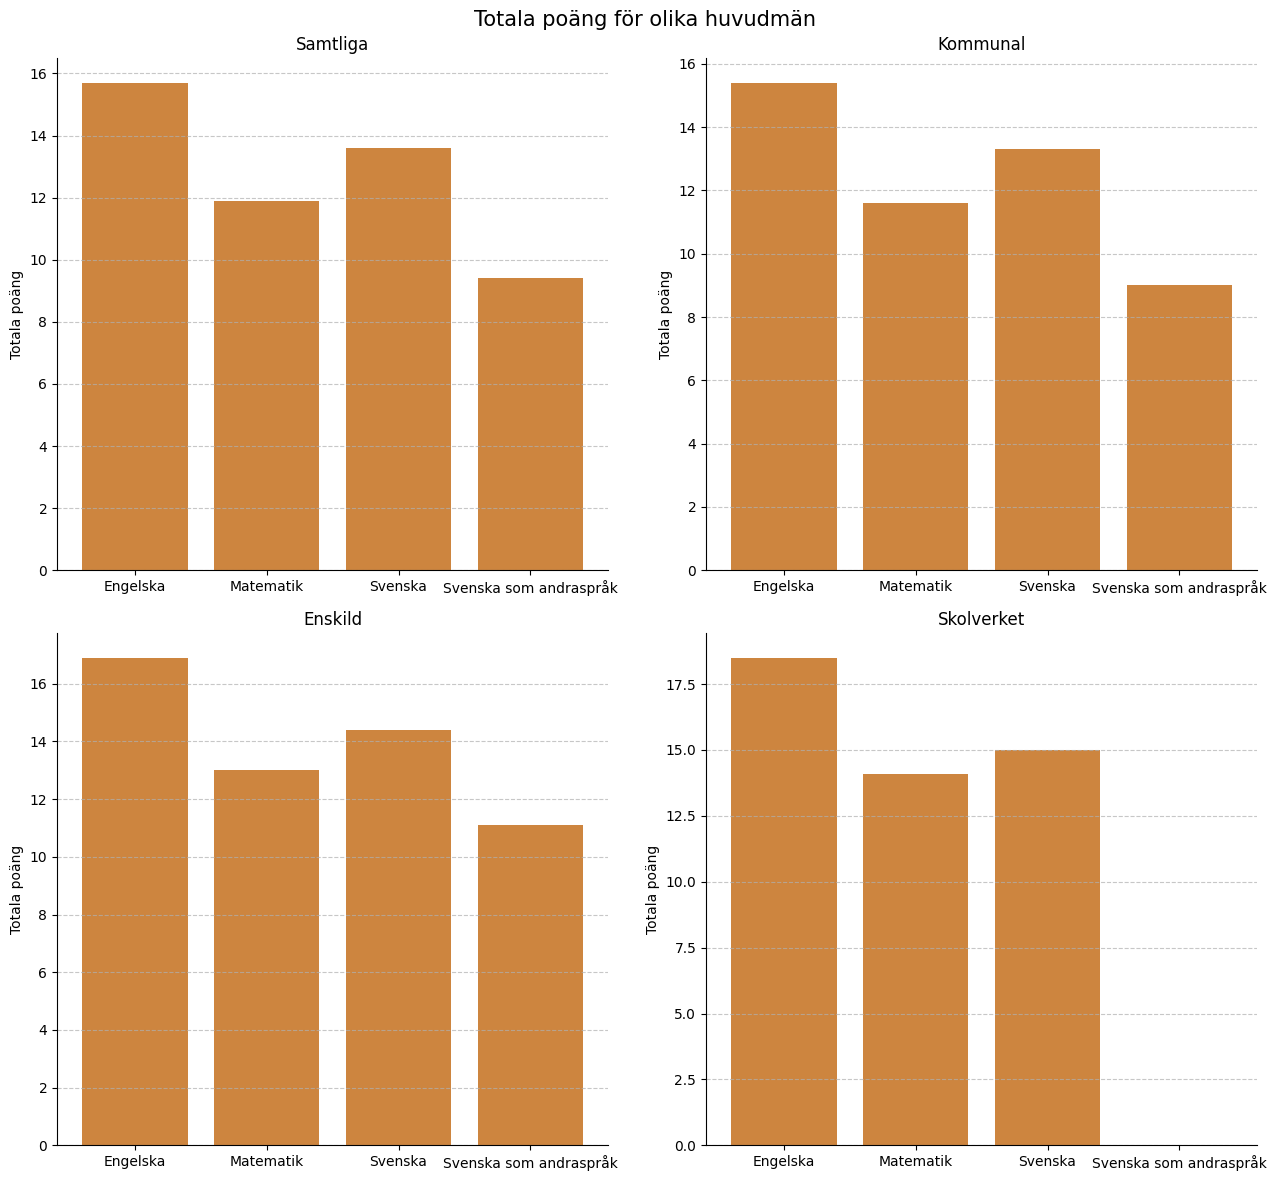

In [14]:
import matplotlib.pyplot as plt

def plot_subplots(df_dict):
    subjects = list(df_dict.keys())
    huvudman = df_dict[subjects[0]]['Huvudman'].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(13, 12))
    fig.suptitle('Totala poäng för olika huvudmän', fontsize=15)
    
    for i, h in enumerate(huvudman):
        total_points = []
        for subject in subjects:
            if subject != "Rapportbeskrivning och def.":
                try:
                    df_huvudman = df_dict[subject][df_dict[subject]['Huvudman'] == h]
                    total_point = float(df_huvudman.iloc[0]["Totalt (poäng)"])
                    total_points.append(total_point)
                except (ValueError, KeyError, IndexError):
                    total_points.append(0)
        
        row = i // 2
        col = i % 2
        
        axes[row, col].bar(subjects[:-1], total_points, color='peru')
        axes[row, col].set_title(f'{h}')
        axes[row, col].set_ylabel('Totala poäng')
        axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)
        axes[row, col].tick_params(axis='x', rotation=0)
        axes[row, col].spines[['top', 'right']].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

plot_subplots(df_riket)

# Uppgift 1 - uppvärmning betyg och prov
a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [41]:
import plotly.express as px

sheet = "Tabell 1B"
df_grades = pd.read_excel("../Laboration2/Data/betyg_o_prov_riksnivå.xlsx", sheet_name=sheet, skiprows=7)

# Rename column names
rename_column = [
    "Läsår/Huvudman/Bakgrund",
    "Totalt (16 ämnen)",
    "Flickor (16 ämnen)",
    "Pojkar (16 ämnen)",
    "Totalt (17 ämnen)",
    "Flickor (17 ämnen)",
    "Pojkar (17 ämnen)",
    "Totalt (saknar godkänt)",
    "Flickor (saknar godkänt)",
    "Pojkar (saknar godkänt)"
]

df_grades.columns = rename_column

,Läsår/Huvudman/Bakgrund,Totalt (16 ämnen),Flickor (16 ämnen),Pojkar (16 ämnen),Totalt (17 ämnen),Flickor (17 ämnen),Pojkar (17 ämnen),Totalt (saknar godkänt),Flickor (saknar godkänt),Pojkar (saknar godkänt)
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3
